In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_s41524-018-0085-8.csv', low_memory=False)

In [3]:
feat_labels = df.columns[1:-1]


In [4]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [5]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [6]:
# T_sep 설정
# 논문 첫 부분에서 T_sep = 10(K)로 두고 설명
T_sep = 10

In [7]:
# T_sep보다 Tc가 높으면 1, 아니면 0
y = np.where(y > T_sep, 1, 0)

In [8]:
# Dataset에서 85%는 train에, 나머지 15%는 test에 사용하기 위해 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, stratify=y)

In [9]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [10]:
importances = forest.feature_importances_

In [11]:
indices = np.argsort(importances)[::-1]

 1) maxdiff_Column                 0.010013
 2) maxdiff_MendeleevNumber        0.014064
 3) dev_Column                     0.012818
 4) MeanIonicChar                  0.011933
 5) dev_Electronegativity          0.010533
 6) MaxIonicChar                   0.009448
 7) dev_GSvolume_pa                0.012816
 8) maxdiff_Electronegativity      0.003588
 9) dev_MeltingT                   0.010941
10) dev_NUnfilled                  0.004171
11) mean_NUnfilled                 0.002645
12) mean_MeltingT                  0.005823
13) dev_CovalentRadius             0.012904
14) Comp_L2Norm                    0.027261
15) dev_MendeleevNumber            0.013990
16) maxdiff_GSvolume_pa            0.003304
17) maxdiff_NdValence              0.007677
18) mean_AtomicWeight              0.002575
19) mean_MendeleevNumber           0.012973
20) dev_NdValence                  0.004428
21) Comp_L3Norm                    0.011034
22) mean_Number                    0.004227
23) mean_Electronegativity      

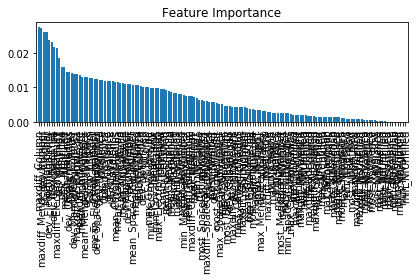

In [12]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[f]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수: ", X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수:  43


In [31]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) maxdiff_Column                 0.027390
 2) maxdiff_MendeleevNumber        0.027261
 3) dev_Column                     0.026129
 4) MeanIonicChar                  0.025900
 5) dev_Electronegativity          0.023677
 6) MaxIonicChar                   0.023070
 7) dev_GSvolume_pa                0.021699
 8) maxdiff_Electronegativity      0.021386
 9) dev_MeltingT                   0.018509
10) dev_NUnfilled                  0.015905
11) mean_NUnfilled                 0.015824
12) mean_MeltingT                  0.014535
13) dev_CovalentRadius             0.014444
14) Comp_L2Norm                    0.014064
15) dev_MendeleevNumber            0.013990
16) maxdiff_GSvolume_pa            0.013964
17) maxdiff_NdValence              0.013423
18) mean_AtomicWeight              0.012973
19) mean_MendeleevNumber           0.012904
20) dev_NdValence                  0.012882
21) Comp_L3Norm                    0.012818
22) mean_Number                    0.012816
23) mean_Electronegativity      

std(column number)      0.026129        (3)

std(electronegativity)  0.023677        (5)

std(melting T)          0.018509        (9)

avg(atomic weight)      0.012973        (18)

In [15]:
# 훈련 데이터 정확도
forest.score(X_train, y_train)

0.9988531288079707

In [16]:
# 테스트 데이터 정확도
forest.score(X_test, y_test)

0.9167681688997158

테스트 세트보다 훈련 세트에서 성능이 높기에 과대적합(overfitting)일 가능성이 큼

논문에서는 과대적합에 대한 논란을 피하기 위해 **순차 특성 선택**(sequential feature selection) 알고리즘을 이용하여 관계없는 특성이나 잡음을 제거한 것으로 보임(계산 효율성이 높아지고, 모델의 일반화 오차를 줄일 수 있다)

Fig.2(d)

참고 : 머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로(길벗, 박해선 옮김)

In [34]:
from sbs import *
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

#X_train_std = stdsc.fit_transform(selected)
#X_test_std = stdsc.transform(selected_test)

C:\Users\LKLAB\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LKLAB\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LKLAB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [37]:
sbs = SBS(forest, k_features=1)


In [55]:
sbs.fit(X_train, y_train)

calc score


TypeError: '(slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144))' is an invalid key